In [90]:
#For the below snapshots, The primary is initiated first and the companion is initiated last

import rebound
import numpy as np
sim=rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=300,e=0.05, inc=np.radians(60))
#sim.move_to_com()
sim.integrator="whfast"
#sim.dt=0.05
#sim.status()
#test

import matplotlib.pyplot as plt

Testparticle= 100
a_initial=np.linspace(10,50,Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a,f=np.random.rand()*2.*np.pi,e=0.01)

sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

sim.N_active=2


In [91]:
#Snapshot.Beginning (No time). (y,z). Debris Disk Diameter = 50 AU
def snapshot_yz(ax):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].y, sim.particles[0].z,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].y, sim.particles[1].z,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$Y$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(sim.particles[i].y, sim.particles[i].z,marker=".",color='k',linewidth=0)

def snapshot_xy(ax):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].x, sim.particles[0].y,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].x, sim.particles[1].y,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Y$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(sim.particles[i].x, sim.particles[i].y,marker=".",color='k',linewidth=0)

def snapshot_xz(ax):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].x, sim.particles[0].z,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].x, sim.particles[1].z,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(sim.particles[i].x, sim.particles[i].z,marker=".",color='k',linewidth=0)

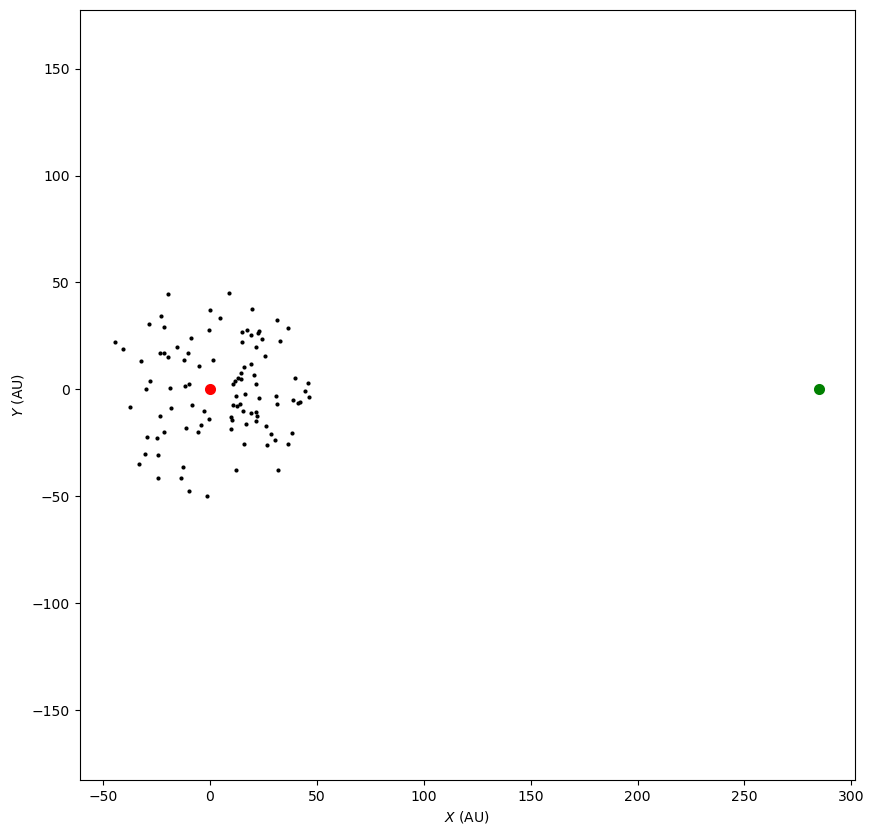

In [92]:
snapshot_xy(ax)

In [93]:
Time=100.*2*np.pi
N_out=20
times=np.linspace(0,Time,N_out)

In [94]:
def time_yz(ax):
    yz=np.zeros((N_out,Testparticle,2))
    for j, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
    for k, p in enumerate(sim.particles[1:-1]):
        yz[j][k]=[p.y,p.z]    
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].y, sim.particles[0].z,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].y, sim.particles[1].z,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$Y$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(yz[:,:,0],yz[:,:,1],marker=".",color='k',linewidth=0)

def time_xy(ax):
    xy=np.zeros((N_out,Testparticle,2))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
    for j, p in enumerate(sim.particles[1:-1]):
        xy[i][j]=[p.x,p.y]    
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].x, sim.particles[0].y,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].x, sim.particles[1].y,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Y$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(xy[:,:,0],xy[:,:,1],marker=".",color='k',linewidth=0)

def time_xz(ax):
    xz=np.zeros((N_out,Testparticle,2))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
    for k, p in enumerate(sim.particles[1:-1]):
        xz[i][k]=[p.x,p.z]    
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].x, sim.particles[0].z,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].x, sim.particles[1].z,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(xz[:,:,0],xz[:,:,1],marker=".",color='k',linewidth=0)

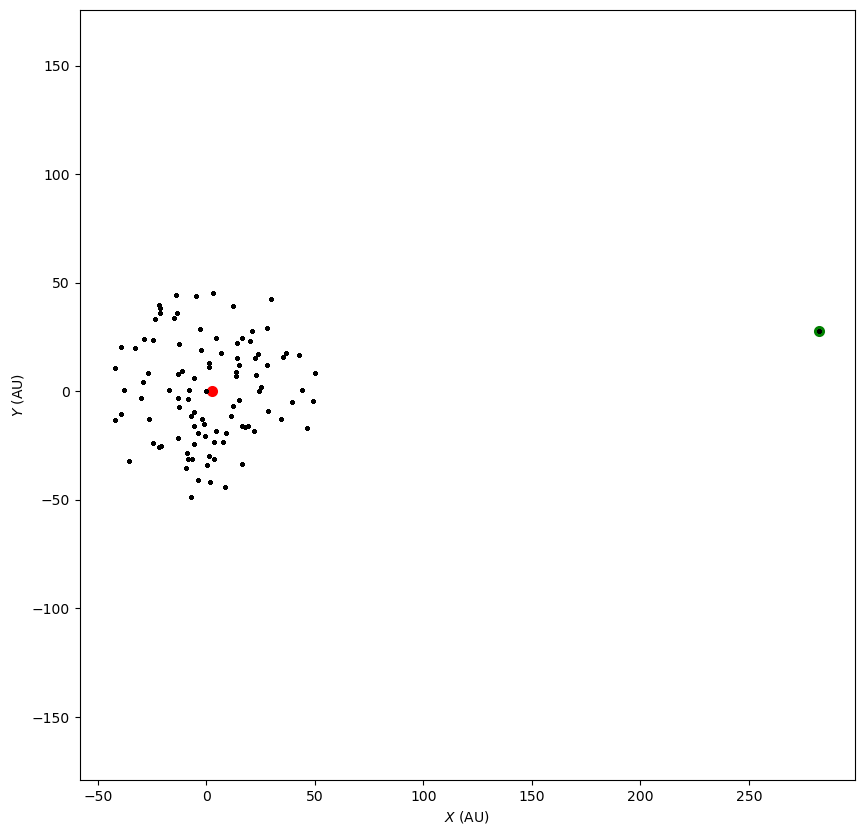

In [95]:
time_xy(ax)

In [37]:
#Time/a,e,inc Graphs
#We also initiated the companion star after the primary for the below simulation

import rebound
import numpy as np
sim=rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=500, e=0.05,inc=np.radians(5))
#sim.add(m=1, a=300, e=0.05)
sim.move_to_com()
sim.integrator="whfast"
#test

import matplotlib.pyplot as plt


Testparticle= 100
a_initial=np.linspace(20,100,Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a,f=np.random.rand()*2.*np.pi,e=0)
    
sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

sim.N_active=2


Time=1000000.*2*np.pi
N_out=2000
xy=np.zeros((N_out,Testparticle,2))
times = np.linspace(0., Time, N_out)


# initialize a, e, and inc arrays
# each array is a matrix [i][j] where [i] refers to the time and [j] to the particle number (the primary is excluded)
a1 = np.zeros((N_out, sim.N-1))
e1 = np.zeros((N_out, sim.N-1))
inc1 = np.zeros((N_out, sim.N-1))


# loop over each timestep
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    # loop over each particle
    for n in range(sim.N-2):
        m = n+2 # skip primary

        # here i'm assigning the quantities to the matrix I deifned above.
        a1[i][n]=sim.particles[m].calculate_orbit(primary=sim.particles[0]).a
        e1[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).e
        inc1[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).inc


In [39]:
import rebound
import numpy as np
sim=rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=500, e=0.05,inc=np.radians(10))
#sim.add(m=1, a=300, e=0.05)
sim.move_to_com()
sim.integrator="whfast"
#test

import matplotlib.pyplot as plt


Testparticle= 100
a_initial=np.linspace(20,100,Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a,f=np.random.rand()*2.*np.pi,e=0)
    
sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

sim.N_active=2


Time=1000000.*2*np.pi
N_out=2000
xy=np.zeros((N_out,Testparticle,2))
times = np.linspace(0., Time, N_out)


a2 = np.zeros((N_out, sim.N-1))
e2 = np.zeros((N_out, sim.N-1))
inc2 = np.zeros((N_out, sim.N-1))


# loop over each timestep
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    # loop over each particle
    for n in range(sim.N-2):
        m = n+2 # skip primary

        # here i'm assigning the quantities to the matrix I deifned above.
        a2[i][n]=sim.particles[m].calculate_orbit(primary=sim.particles[0]).a
        e2[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).e
        inc2[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).inc

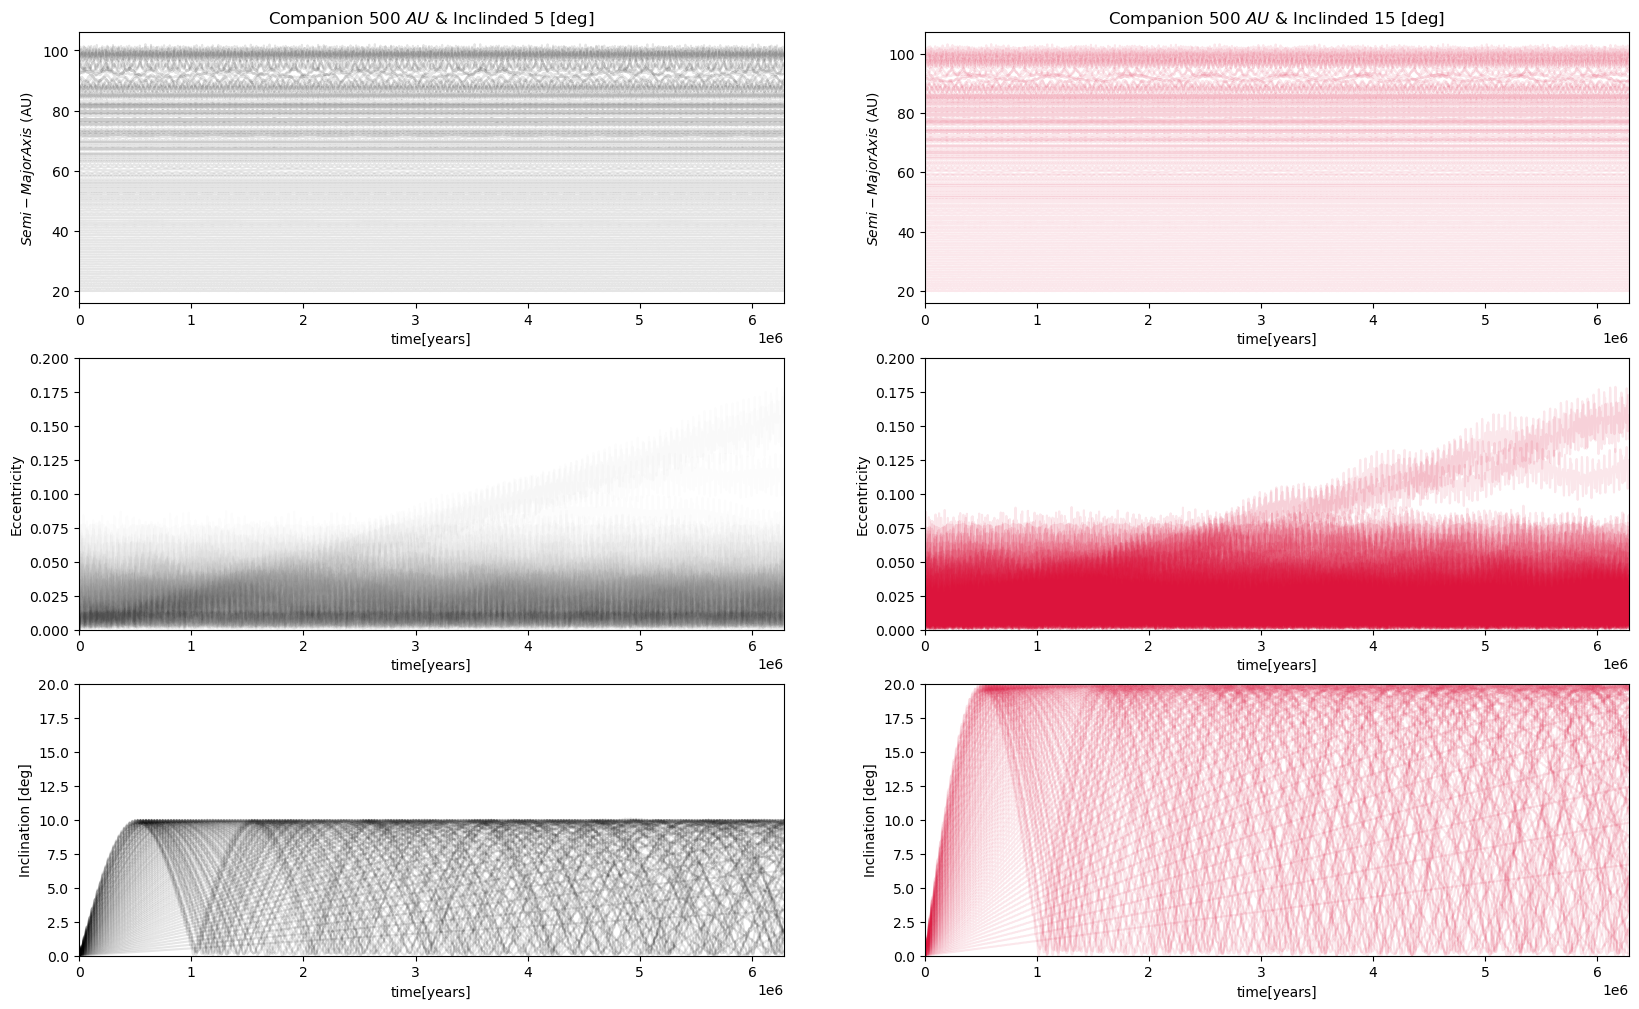

In [44]:

# Maybe Make a plot similar to this, need to define a1, e1, a2 etc. again

fig, ax = plt.subplots(figsize=(20,12), nrows = 3, ncols = 2)


# if i call a[:,:-1] it gives me all times (first entry) and all particles except the last one (which is the binary) (second entry of a)

ax[0,0].plot(times, a1[:,:-1],alpha=.1, color='k')
ax[1,0].plot(times, e1[:,:-1], color ='k',alpha=.01)
#if (a1) <=100 and (a1) >= 80:
    #any = a.all
    #ax[1,0].plot(times, e1[:,:any], color ='b',alpha=.01)
    
ax[2,0].plot(times, np.degrees(inc1[:,:-1]), color = 'k',alpha=.1)

ax[0,1].plot(times, a2[:,:-1],alpha=.1, color='crimson')
ax[1,1].plot(times, e2[:,:-1], color ='crimson',alpha=.1)
ax[2,1].plot(times, np.degrees(inc2[:,:-2]), color = 'crimson',alpha=.1)


ax[0,0].set(ylabel = '$Semi-Major Axis$ (AU)')
ax[1,0].set(ylabel = 'Eccentricity')
ax[2,0].set(ylabel = 'Inclination [deg]')

ax[0,1].set(ylabel = '$Semi-Major Axis$ (AU)')
ax[1,1].set(ylabel = 'Eccentricity')
ax[2,1].set(ylabel = 'Inclination [deg]')

ax[0,0].set_title("Companion 500 $AU$ & Inclinded 5 [deg]")
ax[0,1].set_title("Companion 500 $AU$ & Inclinded 10 [deg]")

ax[1,0].set_ylim(0,.2)
ax[1,1].set_ylim(0,.2)
ax[2,0].set_ylim(0,20)
ax[2,1].set_ylim(0,20)
# make sure the y-limits are the same for each column so comparison is easier

for axi in ax.ravel():
    axi.set(xlabel = 'time[years]', xlim = (times[0], times[-1]))

In [33]:
#a1[:,:]

#fig = plt.figure(figsize=(2,2))
#ax.plot(times, e2[:,:-1], color ='crimson',alpha=.1)
#for axi in ax.ravel():
    #axi.set(xlabel = 'time[years]', xlim = (times[0], times[-1]))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

<Figure size 200x200 with 0 Axes>

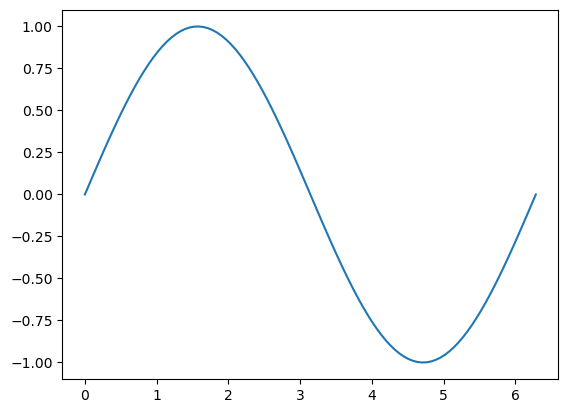

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()

x = np.linspace(0, 2 * np.pi, 100)
line, = ax.plot(x, np.sin(x))

def init():
    line.set_ydata(np.sin(x))
    return line,

def update(frame):
    line.set_ydata(np.sin(x + frame * 0.1))
    return line,

animation = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True)
plt.show()

